# **Load**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df['tenure'].describe().T

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [37]:
f"{(df.isnull().sum().sum() / df.shape[0])*100:.2f}"

'0.16'

In [38]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [39]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [40]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [41]:
for col in df.columns:
  if df[col].dtype == 'object' and col != 'customerID':
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [42]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df

/tmp/ipython-input-3590587622.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [44]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [53]:
for col in df.drop(['customerID', 'Churn'], axis=1).columns:
  if df[col].dtype == 'object':
    values = df[col].unique()
    if len(values) == 2 and :
      print(f"{col}: {values}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
PaperlessBilling: ['Yes' 'No']


In [54]:
for col in df.drop(['customerID', 'Churn'], axis=1).columns:
  if df[col].dtype == 'object':
    values = df[col].unique()
    if len(values) == 2 and col != 'gender':
      df[col] = df[col].replace({'Yes': 1, 'No': 0})
    elif len(values) == 2 and col == 'gender':
      df = pd.get_dummies(df, columns=[col], drop_first=True)
    else:
      df = pd.get_dummies(df, columns=[col], drop_first=True)

/tmp/ipython-input-1671246182.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1671246182.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


In [55]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


In [57]:
for col in df.columns:
  if df[col].dtype == 'bool':
    df[col] = df[col].astype(int)

In [58]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df.dtypes

,0
customerID,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


In [115]:
tenure_corr = df.corr(numeric_only=True)['tenure'].sort_values(ascending=False).reset_index()
regression_vars = list(tenure_corr[tenure_corr['tenure']>0.2]['index'].unique())

In [116]:
regression_vars.remove('tenure')
regression_vars

['TotalCharges',
 'Contract_Two year',
 'Partner',
 'DeviceProtection_Yes',
 'OnlineBackup_Yes',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'MonthlyCharges',
 'PaymentMethod_Credit card (automatic)',
 'Contract_One year']

In [67]:
churn_corr = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False).reset_index()
display(churn_corr.head(3))
display(churn_corr.tail(3))

,index,Churn
0,Churn,1.000000
1,InternetService_Fiber optic,0.307463
2,PaymentMethod_Electronic check,0.301455


,index,Churn
28,TechSupport_No internet service,-0.227578
29,Contract_Two year,-0.301552
30,tenure,-0.354049


In [65]:
from sklearn.model_selection import train_test_split

In [117]:
X = df[regression_vars]
y = df['tenure']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [121]:
y_train_pred = LinReg.predict(X_train)
y_test_pred = LinReg.predict(X_test)

In [122]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [123]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [124]:
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}\n")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}\n")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}\n")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 85.56
Test MSE: 80.42

Train MAE: 7.06
Test MAE: 6.85

Train RMSE: 9.25
Test RMSE: 8.97

Train R2: 0.86
Test R2: 0.87


In [125]:
import statsmodels.api as sm

# Se agrega constante a variables independientes y se ajusta con datos de entrenamiento.
X_train_sm = sm.add_constant(X_train)

# Entrenamiento y resumen (p-values)
linear_model_sm = sm.OLS(y_train, X_train_sm).fit()
print(linear_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 tenure   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2448.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:37:26   Log-Likelihood:                -19216.
No. Observations:                5274   AIC:                         3.846e+04
Df Residuals:                    5260   BIC:                         3.855e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

# **Classifiers**

In [129]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [166]:
import seaborn as sns

## ***Logistic Regression***

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

In [170]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

In [171]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}\n")
print(f"Train Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}\n")
print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")
print(f"Train F1: {f1_train:.2f}")
print(f"Test F1: {f1_test:.2f}")

Train Accuracy: 0.81
Test Accuracy: 0.79

Train Precision: 0.67
Test Precision: 0.62

Train Recall: 0.56
Test Recall: 0.50

Train F1: 0.61
Test F1: 0.56


<Axes: >

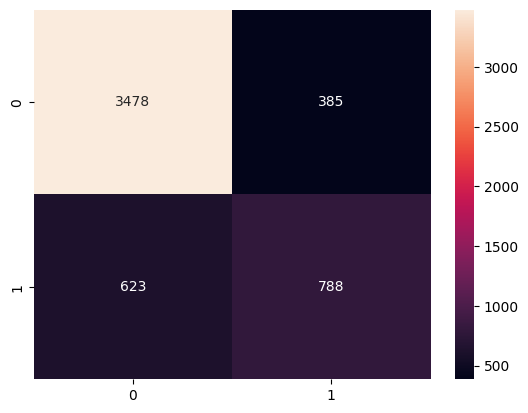

In [172]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')

<Axes: >

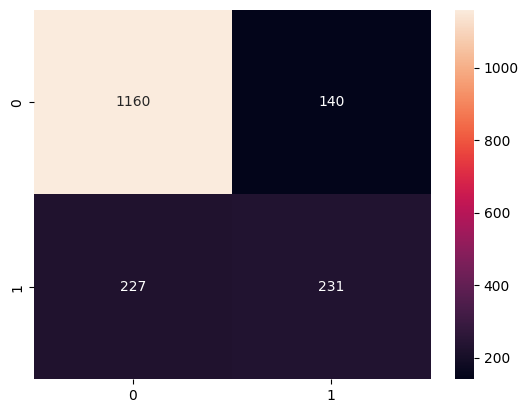

In [173]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

In [174]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3863
           1       0.67      0.56      0.61      1411

    accuracy                           0.81      5274
   macro avg       0.76      0.73      0.74      5274
weighted avg       0.80      0.81      0.80      5274



In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.50      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



## ***Decision Tree Classifier***

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [178]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

In [179]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}\n")

print(f"Train Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}\n")

print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")

print(f"Train F1: {f1_train:.2f}")
print(f"Test F1: {f1_test:.2f}")

Train Accuracy: 0.81
Test Accuracy: 0.79

Train Precision: 0.67
Test Precision: 0.62

Train Recall: 0.56
Test Recall: 0.50

Train F1: 0.61
Test F1: 0.56


<Axes: >

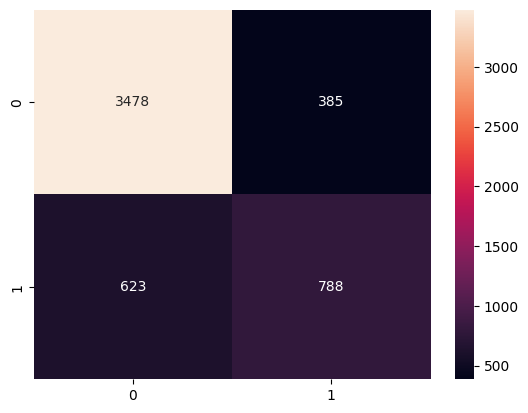

In [180]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')

<Axes: >

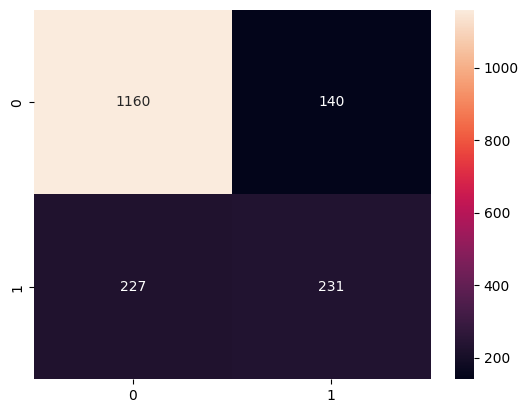

In [181]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

In [182]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3863
           1       0.67      0.56      0.61      1411

    accuracy                           0.81      5274
   macro avg       0.76      0.73      0.74      5274
weighted avg       0.80      0.81      0.80      5274



In [183]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.50      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



## ***Random Forest Classifier***

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [186]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [187]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

In [188]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}\n")
print(f"Train Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}\n")
print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")
print(f"Train F1: {f1_train:.2f}")
print(f"Test F1: {f1_test:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.79

Train Precision: 1.00
Test Precision: 0.62

Train Recall: 1.00
Test Recall: 0.47

Train F1: 1.00
Test F1: 0.54


<Axes: >

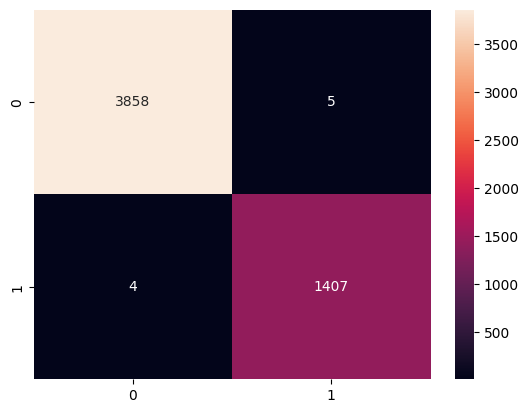

In [189]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')

<Axes: >

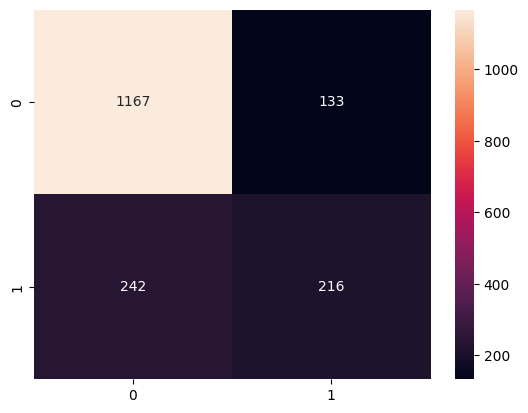

In [190]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

In [191]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      1411

    accuracy                           1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274



In [192]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.62      0.47      0.54       458

    accuracy                           0.79      1758
   macro avg       0.72      0.68      0.70      1758
weighted avg       0.77      0.79      0.78      1758



## **GNB**

In [210]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [211]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [212]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

In [213]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

In [214]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}\n")
print(f"Train Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}\n")
print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")
print(f"Train F1: {f1_train:.2f}")
print(f"Test F1: {f1_test:.2f}")

Train Accuracy: 0.67
Test Accuracy: 0.66

Train Precision: 0.44
Test Precision: 0.42

Train Recall: 0.87
Test Recall: 0.87

Train F1: 0.59
Test F1: 0.57


<Axes: >

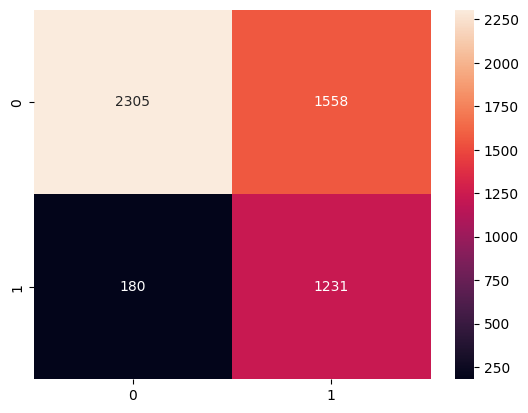

In [215]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')

<Axes: >

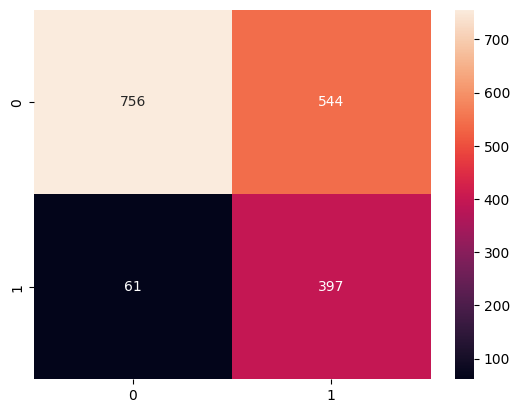

In [216]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

In [217]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73      3863
           1       0.44      0.87      0.59      1411

    accuracy                           0.67      5274
   macro avg       0.68      0.73      0.66      5274
weighted avg       0.80      0.67      0.69      5274



In [218]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1300
           1       0.42      0.87      0.57       458

    accuracy                           0.66      1758
   macro avg       0.67      0.72      0.64      1758
weighted avg       0.79      0.66      0.68      1758



## **MNB**

In [219]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [220]:
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)

In [221]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

In [222]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}\n")
print(f"Train Precision: {train_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}\n")
print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")
print(f"Train F1: {f1_train:.2f}")
print(f"Test F1: {f1_test:.2f}")

Train Accuracy: 0.69
Test Accuracy: 0.70

Train Precision: 0.45
Test Precision: 0.45

Train Recall: 0.74
Test Recall: 0.75

Train F1: 0.56
Test F1: 0.56


<Axes: >

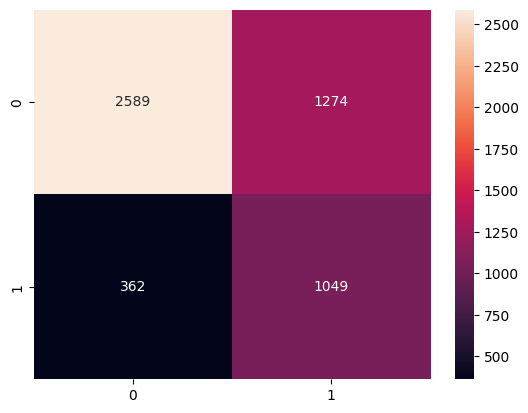

In [223]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')

<Axes: >

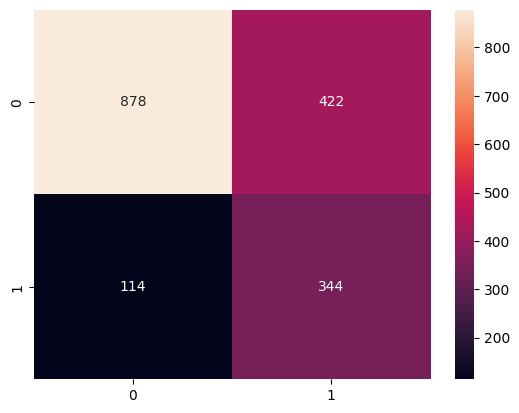

In [224]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

In [225]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      3863
           1       0.45      0.74      0.56      1411

    accuracy                           0.69      5274
   macro avg       0.66      0.71      0.66      5274
weighted avg       0.76      0.69      0.71      5274



In [226]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1300
           1       0.45      0.75      0.56       458

    accuracy                           0.70      1758
   macro avg       0.67      0.71      0.66      1758
weighted avg       0.77      0.70      0.71      1758

